In [27]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Load your dataset into a Pandas DataFrame (replace 'your_dataset.csv' with your file)
df_encoded = pd.read_excel(r'C:\Users\Shardul\OneDrive - London Business School\coding\anya\data\ppie-cleaned-v3.xlsx')

# df_encoded = pd.read_excel(r'/content/ppie-cleaned-v2.xlsx')

In [29]:
# order_list_yessometimes = ["Yes","Yes, sometimes", "No", "Not applicable", "Don't know/can't remember"]

# order_list_likert =  ["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree", "Other"]

# order_list_likert_num = ['5','4','3','2','1']

# # order_list_yespartly = ["Yes","Yes, partly", "No", "Not applicable", "Don't know/can't remember"]

# # Replace infinite values with NaN in your DataFrame
# df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True) 

# df_encoded['is_partner'].value_counts()

is_partner
0    184
1     11
Name: count, dtype: int64

In [30]:
# # Assuming 'df_encoded' is a Pandas DataFrame
# partner_vars = [col for col in df_encoded.columns if 'partner' in col]

# print(partner_vars)  # List the columns containing 'partner'

['birthing_parent_or_partner', 'anc_partner_antenatal_difficulty', 'partner_gestational_age_weeks', 'partner_birth_type', 'partner_postnatal_info', 'partner_postnatal_kindness', 'partner_early_life_feeding', "80 - Thinking about your partner's postnatal care, did you have the knowledge you needed to understand your partner's care or recovery?", 'partner_pnc_postnatal_mental_health_info', 'partner_pnc_feeding_support_info', 'partner_pnc_feeding_info_usefulness', 'partner_pnc_out_of_hours_feeding_support', 'partner_pnc_out_of_hours_info_usefulness', 'partner_pnc_postnatal_baby_development_advice', 'partner_pnc_baby_development_advice_usefulness', 'partner_non_breastfeeding_reason', 'partner_breastfeeding_stop_reason', 'is_partner']


In [31]:
# # Get response levels for each variable
# for col in partner_vars:
#     if df_encoded[col].dtype == 'object':  # Categorical variable
#         unique_values = df_encoded[col].unique()
#         print(f"\nUnique values for '{col}': {unique_values}")
#     elif df_encoded[col].dtype == 'int64' or df_encoded[col].dtype == 'float64':  # Numerical variable
#         summary_stats = df_encoded[col].describe()
#         print(f"\nSummary statistics for '{col}':\n{summary_stats}")

### Demographic description

In [32]:
total_responses = len(df_encoded)
print(f"Total number of responses we received were {total_responses}")

Total number of responses we received were 195


#### Age Description

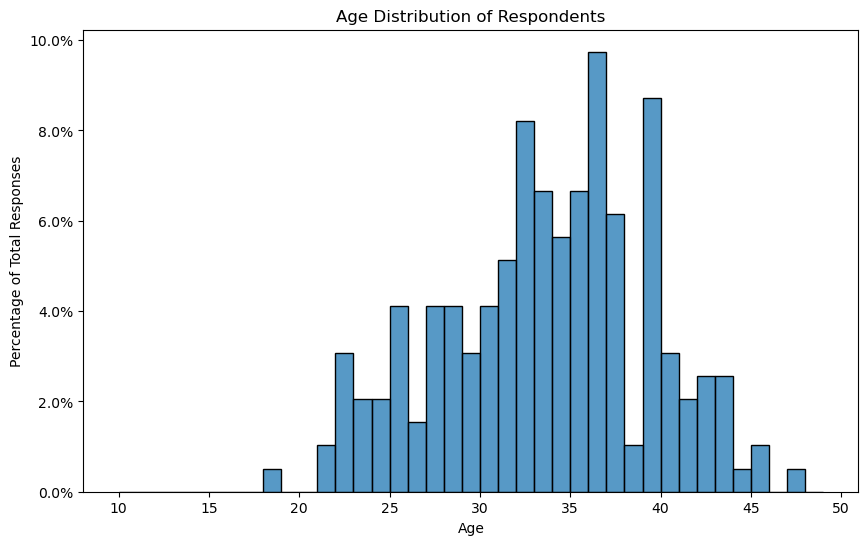

In [33]:
# Plotting age distribution
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_encoded['age'], bins=np.arange(10, 50), stat='percent')
ax.yaxis.set_major_formatter(PercentFormatter())
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Percentage of Total Responses')
plt.show()

#### Pregnancy Stage

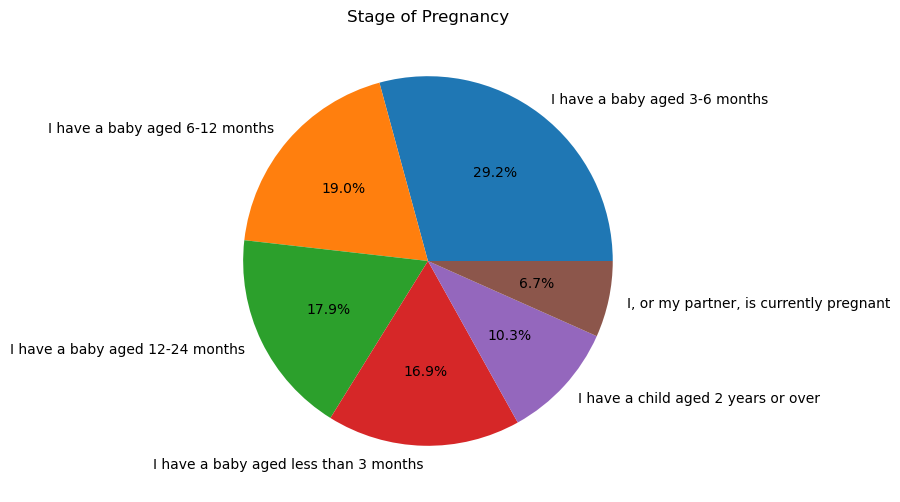

,Frequency,Percentage
pregnancy_stage,,
I have a baby aged 3-6 months,57,29.23%
I have a baby aged 6-12 months,37,18.97%
I have a baby aged 12-24 months,35,17.95%
I have a baby aged less than 3 months,33,16.92%
I have a child aged 2 years or over,20,10.26%
"I, or my partner, is currently pregnant",13,6.67%


In [34]:
# Convert count data to proportions
pregnancy_stage_counts = df_encoded['pregnancy_stage'].value_counts(normalize=True)
pregnancy_stage_data = pd.DataFrame({'Stage': pregnancy_stage_counts.index, 'Proportion': pregnancy_stage_counts.values})

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(pregnancy_stage_data['Proportion'], labels=pregnancy_stage_data['Stage'], autopct='%1.1f%%')
plt.title('Stage of Pregnancy')
plt.show()


# Calculate the frequency of each category in 'pregnancy_stage'
pregnancy_stage_counts = df_encoded['pregnancy_stage'].value_counts()
# Calculate percentages from frequencies
pregnancy_stage_percentages = df_encoded['pregnancy_stage'].value_counts(normalize=True) * 100

# Create a DataFrame from frequencies and percentages
pregnancy_stage_df = pd.DataFrame({
    'Frequency': pregnancy_stage_counts,
    'Percentage': pregnancy_stage_percentages
})

# Format the DataFrame to display percentages with two decimal places
formatted_pregnancy_stage_df = pregnancy_stage_df.style.format({
    'Percentage': "{:.2f}%"
})

# Display the styled DataFrame
formatted_pregnancy_stage_df

#### Ethnic Groups

In [35]:
def format_ethnic_group_table(df):
    """
    Generates a styled table displaying the frequency and percentage of ethnic groups.

    Args:
        df (pd.DataFrame): DataFrame containing the 'demo_ethnic_group' column.

    Returns:
        pd.DataFrame: A styled DataFrame.
    """
    # Calculate the frequency of each ethnic group
    ethnic_group_counts = df['demo_ethnic_group'].value_counts().reset_index()
    ethnic_group_counts.columns = ['Ethnic Group', 'Count']

    # Calculate percentages
    total = ethnic_group_counts['Count'].sum()
    ethnic_group_counts['Frequency %'] = (ethnic_group_counts['Count'] / total * 100).round(2)

    # Sort by 'Ethnic Group'
    ethnic_group_counts = ethnic_group_counts.set_index('Ethnic Group').sort_index()

    # Style the DataFrame
    styled_df = ethnic_group_counts.style.format({
        'Frequency %': "{:.2f}%"
    })

    styled_df = styled_df.set_properties(**{
        'text-align': 'left',
        'white-space': 'normal'
    })
    styled_df = styled_df.set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'left')]},
       # {'selector': '.index_name', 'props': [('display', 'none')]}  # Hides the index name if it appears
    ])

    return styled_df

# Usage example
styled_table = format_ethnic_group_table(df_encoded)
styled_table


,Count,Frequency %
Ethnic Group,,
Any other ethnic group,2,1.03%
Arab,5,2.56%
Asian/Asian British: Any other Asian background,3,1.54%
Asian/Asian British: Bangladeshi,5,2.56%
Asian/Asian British: Chinese,3,1.54%
Asian/Asian British: Indian,9,4.62%
Asian/Asian British: Pakistani,8,4.10%
Black/African/Caribbean/Black British: African background,7,3.59%
I would prefer not to say,2,1.03%


In [36]:
import pandas as pd

def generate_all_frequency_tables(df, variables_info):
    """
    Generates frequency tables for a list of variables with given titles and response levels.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        variables_info (dict): Dictionary with variable names as keys and properties such as response levels and titles as values.

    Returns:
        dict: A dictionary of frequency tables for each variable.
    """
    tables = {}
    
    # Filter the DataFrame for rows where is_partner == 1
    df_partner = df[df['is_partner'] == 1]

    for variable, info in variables_info.items():
        levels_order = info.get('response_levels', None)
        title = info['title']
        
        # Overall frequency and percentage calculation
        counts = df_partner[variable].value_counts(dropna=False).reindex(levels_order, fill_value=0)
        total_counts = df_partner[variable].notna().sum()
        percentages = (counts / total_counts * 100).round(2)
        descriptive_df = pd.DataFrame({"Frequency": counts, "Frequency %": percentages})
        
        # Add the "Total" row
        total_row = pd.DataFrame({"Frequency": [counts.sum()], "Frequency %": [100]}, index=["Total"])
        descriptive_df = pd.concat([descriptive_df, total_row])

        # Apply styling to DataFrame using map
        styled_df = descriptive_df.style.set_table_styles(
            [
                {"selector": "th", "props": [("border", "1px solid black")]},
                {"selector": "td", "props": [("border", "1px solid grey")]},
            ]
        ).format("{:.2f}", subset="Frequency %").background_gradient(
            cmap="viridis",
            subset=["Frequency %"]
        )

        # Apply background color using map
        styled_df = styled_df.applymap(
            lambda x: "background-color: white", subset=pd.IndexSlice["Total", :]
        )

        variable_title = info.get('title', "No Title Available")
        tables[variable] = {"DataFrame": styled_df, "Title": variable_title}
    
    return tables

# Variables information dictionary
variables_info = {
    'birthing_parent_or_partner': {'title': 'Birthing Parent or Partner', 'response_levels': ['Birthing parent', 'Partner']},
    'anc_partner_antenatal_difficulty': {'title': 'ANC Partner Antenatal Difficulty'},
    'partner_gestational_age_weeks': {'title': 'Partner Gestational Age (Weeks)'},
    'partner_birth_type': {'title': 'Partner Birth Type', 'response_levels': ['Planned cesarean section', 'Assisted vaginal birth (e.g. induction, forceps, vacuum extraction)', 'Vaginal delivery (spontaneous) - at hospital', 'Emergency cesarean section']},
    'partner_postnatal_info': {'title': 'Partner Postnatal Info', 'response_levels': ['Yes', 'No', 'Yes, sometimes']},
    'partner_postnatal_kindness': {'title': 'Partner Postnatal Kindness', 'response_levels': ['Yes', 'Yes, sometimes', 'No']},
    'partner_early_life_feeding': {'title': 'Partner Early Life Feeding', 'response_levels': ['Breastfed or expressed breastmilk only', 'Both breastfed and formula-fed', 'Formula-fed only']},
    '80 - Thinking about your partner\'s postnatal care, did you have the knowledge you needed to understand your partner\'s care or recovery?': {'title': 'Knowledge Needed to Understand Partner\'s Care', 'response_levels': ['Don\'t know/can\'t remember', 'Yes, sometimes', 'No', 'Yes']},
    'partner_pnc_postnatal_mental_health_info': {'title': 'Partner PNC Postnatal Mental Health Info', 'response_levels': ['Yes, sometimes', 'No', 'Don\'t know/can\'t remember']},
    'partner_pnc_feeding_support_info': {'title': 'Partner PNC Feeding Support Info', 'response_levels': ['NHS healthcare professional (e.g., doctor, nurse, midwife, health visitor)', 'Support groups', 'Online resources', 'Parenting app', 'Family and friends', 'Previous experience with brothers', 'I didn\'t access any information or support']},
    'partner_pnc_feeding_info_usefulness': {'title': 'Partner PNC Feeding Info Usefulness'},
    'partner_pnc_out_of_hours_feeding_support': {'title': 'Partner PNC Out of Hours Feeding Support', 'response_levels': ['I did not need to access out-of-hours support', 'Online parenting forums or websites', 'Parenting app', 'Family and friends']},
    'partner_pnc_out_of_hours_info_usefulness': {'title': 'Partner PNC Out of Hours Info Usefulness'},
    'partner_pnc_postnatal_baby_development_advice': {'title': 'Partner PNC Postnatal Baby Development Advice', 'response_levels': ['Yes', 'Yes, sometimes', 'No']},
    'partner_pnc_baby_development_advice_usefulness': {'title': 'Partner PNC Baby Development Advice Usefulness'},
    'partner_non_breastfeeding_reason': {'title': 'Partner Non-Breastfeeding Reason', 'response_levels': ['Skip this question/rather not say', 'I was told/believe that formula milk is just as good', 'Milk didn\'t come in', 'I don’t know']},
    'partner_breastfeeding_stop_reason': {'title': 'Partner Breastfeeding Stop Reason', 'response_levels': ['Breastfeeding is too time consuming/it was too difficult with other commitments', 'My partner was on medication that was incompatible for breastfeeding', 'People around us told us it was easier to bottle feed', 'My partner couldn\'t access breastfeeding support to help them continue', 'My partner reached their own breastfeeding goals', 'My partner needed to go back to work', 'So that I or others could feed the baby']},
    'is_partner': {'title': 'Is Partner'}
}

# Generate frequency tables
tables = generate_all_frequency_tables(df_encoded, variables_info)

# To display the tables, you can use:
for variable, table_info in tables.items():
    print(f"Frequency table for {variable}")
    display(table_info['DataFrame'])
    print("\n")


Frequency table for birthing_parent_or_partner


,Frequency,Frequency %
Birthing parent,0,0.00
Partner,11,100.00
Total,11,100.00




Frequency table for anc_partner_antenatal_difficulty


,Frequency,Frequency %
3.000000,5,45.45
2.000000,4,36.36
5.000000,1,9.09
1.000000,1,9.09
Total,11,100.00




Frequency table for partner_gestational_age_weeks


,Frequency,Frequency %
36.000000,6,54.55
39.000000,2,18.18
41.000000,1,9.09
38.000000,1,9.09
40.000000,1,9.09
Total,11,100.00




Frequency table for partner_birth_type


,Frequency,Frequency %
Planned cesarean section,2,18.18
"Assisted vaginal birth (e.g. induction, forceps, vacuum extraction)",1,9.09
Vaginal delivery (spontaneous) - at hospital,0,0.00
Emergency cesarean section,7,63.64
Total,10,100.00




Frequency table for partner_postnatal_info


,Frequency,Frequency %
Yes,3,27.27
No,3,27.27
"Yes, sometimes",5,45.45
Total,11,100.00




Frequency table for partner_postnatal_kindness


,Frequency,Frequency %
Yes,4,36.36
"Yes, sometimes",5,45.45
No,2,18.18
Total,11,100.00




Frequency table for partner_early_life_feeding


,Frequency,Frequency %
Breastfed or expressed breastmilk only,4,36.36
Both breastfed and formula-fed,1,9.09
Formula-fed only,5,45.45
Total,10,100.00




Frequency table for 80 - Thinking about your partner's postnatal care, did you have the knowledge you needed to understand your partner's care or recovery?


,Frequency,Frequency %
Don't know/can't remember,1,9.09
"Yes, sometimes",5,45.45
No,4,36.36
Yes,1,9.09
Total,11,100.00




Frequency table for partner_pnc_postnatal_mental_health_info


,Frequency,Frequency %
"Yes, sometimes",6,54.55
No,4,36.36
Don't know/can't remember,1,9.09
Total,11,100.00




Frequency table for partner_pnc_feeding_support_info


,Frequency,Frequency %
"NHS healthcare professional (e.g., doctor, nurse, midwife, health visitor)",0,0.00
Support groups,0,0.00
Online resources,1,9.09
Parenting app,0,0.00
Family and friends,0,0.00
Previous experience with brothers,0,0.00
I didn't access any information or support,1,9.09
Total,2,100.00




Frequency table for partner_pnc_feeding_info_usefulness


,Frequency,Frequency %
3.000000,6,54.55
4.000000,3,27.27
1.000000,1,9.09
5.000000,1,9.09
Total,11,100.00




Frequency table for partner_pnc_out_of_hours_feeding_support


,Frequency,Frequency %
I did not need to access out-of-hours support,2,18.18
Online parenting forums or websites,4,36.36
Parenting app,0,0.00
Family and friends,0,0.00
Total,6,100.00




Frequency table for partner_pnc_out_of_hours_info_usefulness


,Frequency,Frequency %
3.000000,8,72.73
4.000000,2,18.18
1.000000,1,9.09
Total,11,100.00




Frequency table for partner_pnc_postnatal_baby_development_advice


,Frequency,Frequency %
Yes,1,9.09
"Yes, sometimes",8,72.73
No,2,18.18
Total,11,100.00




Frequency table for partner_pnc_baby_development_advice_usefulness


,Frequency,Frequency %
3.000000,7,70.00
4.000000,2,20.00
1.000000,1,10.00
nan,1,10.00
Total,11,100.00




Frequency table for partner_non_breastfeeding_reason


,Frequency,Frequency %
Skip this question/rather not say,1,20.00
I was told/believe that formula milk is just as good,0,0.00
Milk didn't come in,0,0.00
I don’t know,2,40.00
Total,3,100.00




Frequency table for partner_breastfeeding_stop_reason


,Frequency,Frequency %
Breastfeeding is too time consuming/it was too difficult with other commitments,0,0.00
My partner was on medication that was incompatible for breastfeeding,0,0.00
People around us told us it was easier to bottle feed,0,0.00
My partner couldn't access breastfeeding support to help them continue,1,33.33
My partner reached their own breastfeeding goals,0,0.00
My partner needed to go back to work,0,0.00
So that I or others could feed the baby,0,0.00
Total,1,100.00




Frequency table for is_partner


,Frequency,Frequency %
1,11,100.00
Total,11,100.00
